Customer Segmentation Analysis

Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('C:/Users/karth/Downloads/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

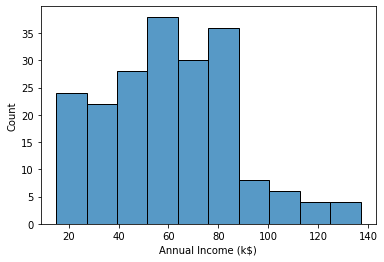

In [7]:
sns.histplot(data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

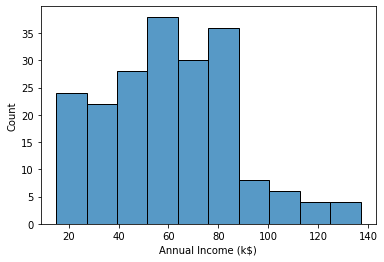

In [6]:
sns.histplot(data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

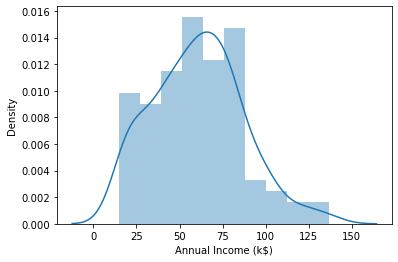

In [8]:
sns.distplot(data['Annual Income (k$)'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

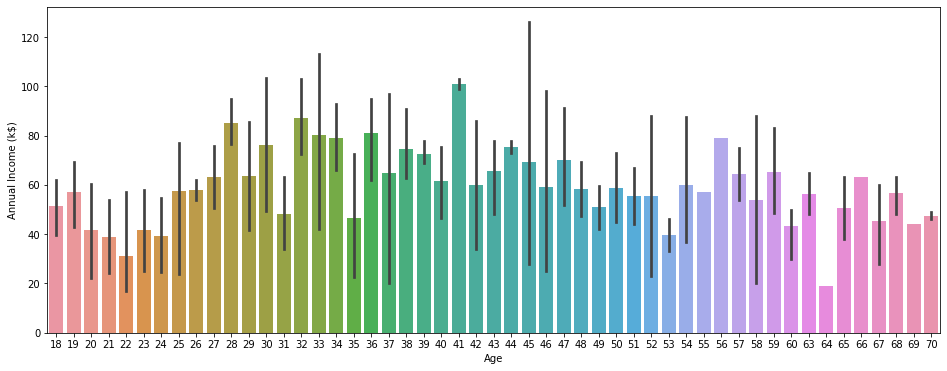

In [9]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

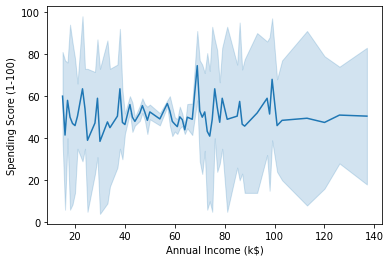

In [10]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

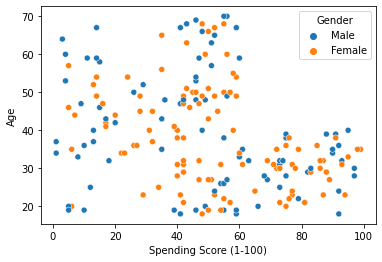

In [12]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])

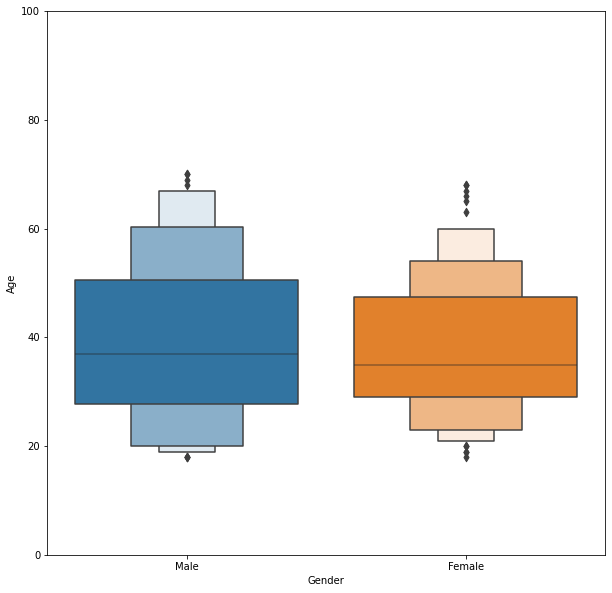

In [15]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

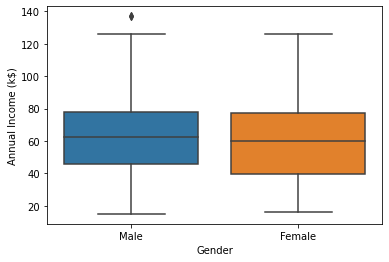

In [16]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

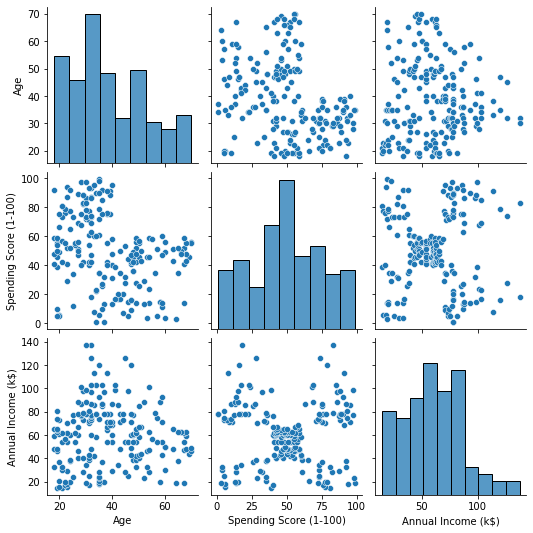

In [18]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

<AxesSubplot:>

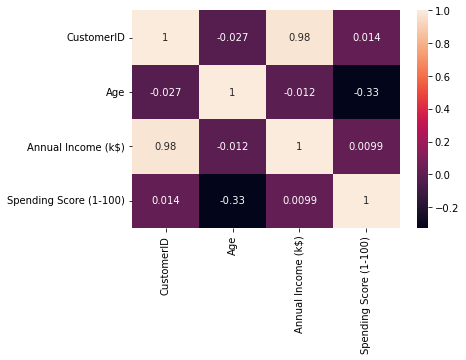

In [19]:
sns.heatmap(data.corr(),annot=True)

In [20]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
data.info
data.shape

(200, 5)

In [22]:
data.isnull().any() 

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [23]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


{'whiskers': [<matplotlib.lines.Line2D at 0x2153b6ecb80>,
 'caps': [<matplotlib.lines.Line2D at 0x2153bc38160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2153b6ec8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2153bc38700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2153bc389d0>],
 'means': []}

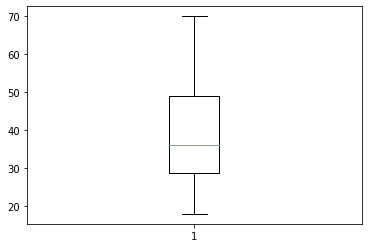

In [25]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2153bc88c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2153bc981f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2153bc889a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2153bc98790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2153bc98a60>],
 'means': []}

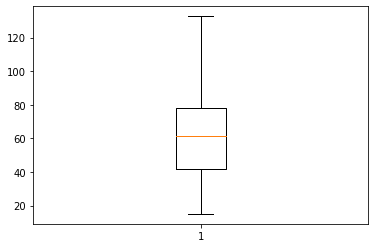

In [26]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2153bceda30>,
 'caps': [<matplotlib.lines.Line2D at 0x2153bcedfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2153bced760>],
 'medians': [<matplotlib.lines.Line2D at 0x2153bcfb5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2153bcfb880>],
 'means': []}

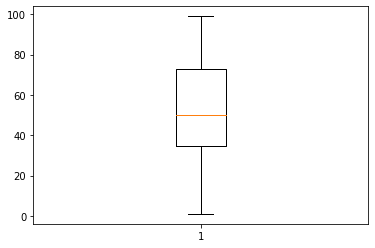

In [27]:
plt.boxplot(data['Spending Score (1-100)'])

In [29]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [32]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([4, 4, 5, 5, 5, 5, 1, 5, 3, 5, 3, 5, 1, 5, 0, 4, 5, 4, 3, 5, 4, 4,
       1, 4, 1, 4, 1, 4, 1, 5, 3, 5, 3, 4, 1, 5, 1, 5, 1, 5, 1, 4, 3, 5,
       1, 5, 1, 5, 5, 5, 1, 4, 5, 3, 1, 3, 1, 3, 5, 3, 3, 4, 1, 1, 3, 4,
       1, 1, 4, 5, 3, 1, 1, 1, 3, 4, 1, 4, 5, 1, 3, 4, 3, 1, 5, 3, 1, 5,
       5, 1, 1, 4, 3, 1, 5, 4, 1, 5, 3, 4, 5, 1, 3, 4, 3, 5, 1, 3, 3, 3,
       3, 5, 1, 4, 5, 5, 1, 1, 1, 1, 4, 7, 6, 2, 5, 6, 0, 2, 3, 2, 0, 2,
       5, 6, 0, 6, 7, 2, 0, 6, 7, 2, 5, 6, 0, 2, 3, 6, 7, 2, 0, 2, 7, 6,
       7, 6, 0, 6, 0, 6, 7, 6, 0, 6, 0, 6, 0, 6, 7, 2, 0, 2, 0, 2, 7, 6,
       3, 2, 3, 2, 7, 6, 0, 6, 7, 2, 7, 2, 7, 6, 7, 6, 0, 6, 7, 6, 7, 2,
       0, 2])

In [33]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [34]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,4
1,1.0,0.057692,0.000000,0.816327,4
2,0.0,0.038462,0.008493,0.051020,5
3,0.0,0.096154,0.008493,0.775510,5
4,0.0,0.250000,0.016985,0.397959,5


In [35]:
data1['kclus'].unique()

array([4, 5, 1, 3, 0, 7, 6, 2])

In [36]:
data1['kclus'].value_counts()

5    37
1    37
3    29
4    24
6    22
2    18
0    17
7    16
Name: kclus, dtype: int64

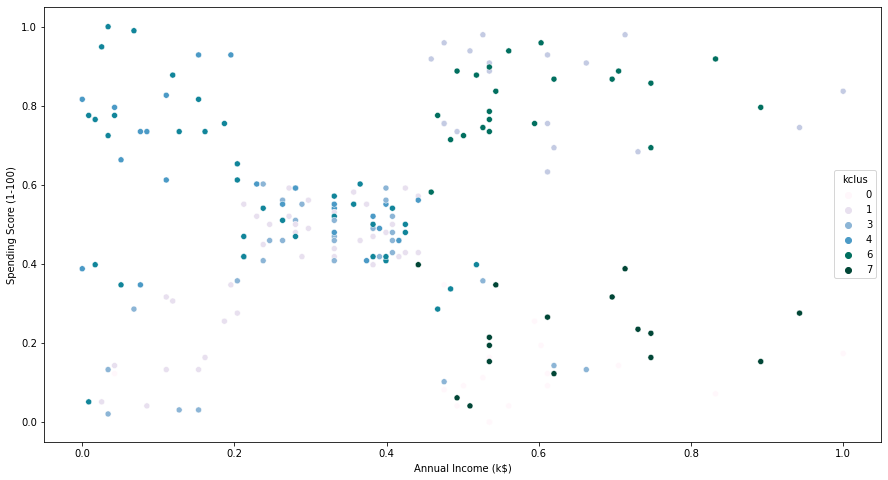

In [37]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [38]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [39]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,4
1,4
2,5
3,5
4,5


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [41]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [42]:
y_train.head()

,kclus
116,1
67,1
78,5
42,3
17,4


In [43]:
y_test.head()

,kclus
58,5
40,1
34,1
102,3
184,7


In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[4.48559031],
       [2.5138261 ],
       [2.88849999],
       [1.52869994],
       [4.24828231]])

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.3165542309795835
The Root mean squared error is:  1.8211409146410344
The Mean absolute error is:  1.5408877063972828
The accuracy is:  0.2703742830893118
